# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/absolute/3D/"

### Load

In [4]:
listfile = os.listdir(dirname)
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [5]:
row_lengths = {}
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'unser': [90, 60, 89, 81, 63, 94, 65, 80, 101, 92, 69, 59, 77, 48, 117, 52, 73, 88, 74, 51, 65, 61, 51, 93, 69, 95, 73, 79, 45, 45, 92, 76, 59, 77, 83, 58, 83, 77, 83, 77, 89, 75, 72, 91, 87, 77, 85, 80, 97, 89, 92, 90, 72, 61, 91, 90, 69, 78, 79, 60, 91, 66, 89, 76, 61, 89, 65], 'du': [82, 76, 66, 92, 51, 84, 70, 67, 65, 73, 55, 57, 54, 72, 89, 72, 86, 80, 46, 45, 48, 63, 68, 51, 76, 70, 47, 66, 52, 69, 76, 52, 58, 77, 91, 72, 76, 41, 70, 91, 61, 76, 64, 84, 41, 67, 48, 43, 48, 53, 65, 60, 64, 65, 62, 80, 69, 85, 44, 80, 69, 64, 93, 79, 40, 52, 70, 45, 74, 79], 'zeigen': [82, 76, 45, 87, 50, 58, 78, 66, 76, 99, 90, 60, 74, 42, 91, 84, 76, 77, 40, 84, 72, 69, 78, 81, 73, 74, 77, 74, 67, 48, 60, 51, 72, 78, 66, 71, 47, 88, 93, 92, 72, 86, 87, 50, 86, 76, 93, 67, 66, 86, 72, 81, 90, 70, 69, 89, 87, 65, 46, 86, 77, 65, 87, 89, 70, 87, 77, 84, 87, 73], 'Software': [50, 85, 73, 78, 74, 82, 80, 92, 83, 76, 62, 67, 62, 62, 86, 94, 76, 45, 87, 106, 88, 65, 72, 93, 76, 58, 72, 64, 87, 92, 50, 

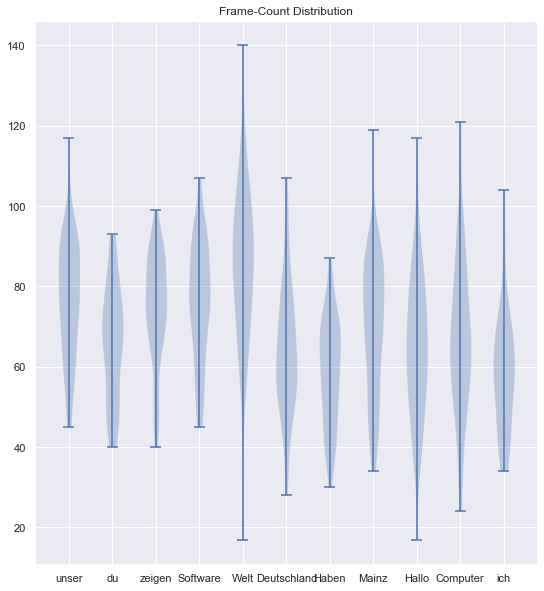

In [6]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,10))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()

In [7]:
sign = np.array(data[20][1])
np.nan_to_num(sign, copy=False)
rows = []
for row in sign:
    x, y = row[::2], row[1::2]
    rows.append((x,y))


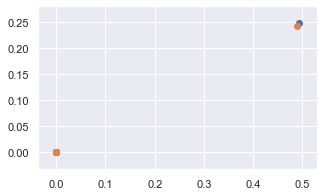

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = ax.scatter(rows[1][0], rows[1][1])
def animate(i):
    ax.scatter(rows[i][0], rows[i][1])
anim = FuncAnimation(
fig, animate, interval=12, frames=len(rows)-1)